In [44]:
import numpy as np

In [45]:
def load_data(data_path, data_length):
    with open (data_path, "r") as f:
        data = f.read()
    int_data = [float(i) for i in data.split(" ") if len(i) > 0]
    data = []
    for i in range(0, len(int_data), data_length):
        data.append(int_data[i:(i+data_length)])
    return np.array(data)

In [46]:
X_train = load_data("data/train_data.txt", 1024)
X_valid = load_data("data/valid_data.txt", 1024)
X_test = load_data("data/test_data.txt", 1024)

y_train = load_data("data/train_label.txt", 10)
y_valid = load_data("data/valid_label.txt", 10)
y_test = load_data("data/test_label.txt", 10)

In [47]:
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=50,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/digit.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/50
31/31 [==============================] - 0s 6ms/step - loss: 2.1099 - acc: 0.2539 - val_loss: 1.8565 - val_acc: 0.4420
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 1.5938 - acc: 0.6122 - val_loss: 1.3126 - val_acc: 0.7300
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 1.0738 - acc: 0.8283 - val_loss: 0.8810 - val_acc: 0.8580
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.6986 - acc: 0.8992 - val_loss: 0.6150 - val_acc: 0.8780
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 0.4916 - acc: 0.9219 - val_loss: 0.4439 - val_acc: 0.9220
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 0.3804 - acc: 0.9369 - val_loss: 0.3727 - val_acc: 0.9200
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 0.3111 - acc: 0.9436 - val_loss: 0.3082 - val_acc: 0.9460
Epoch 8/50
31/31 [==============================] - 0s 3ms/step - loss: 0.2676 - acc: 0.94

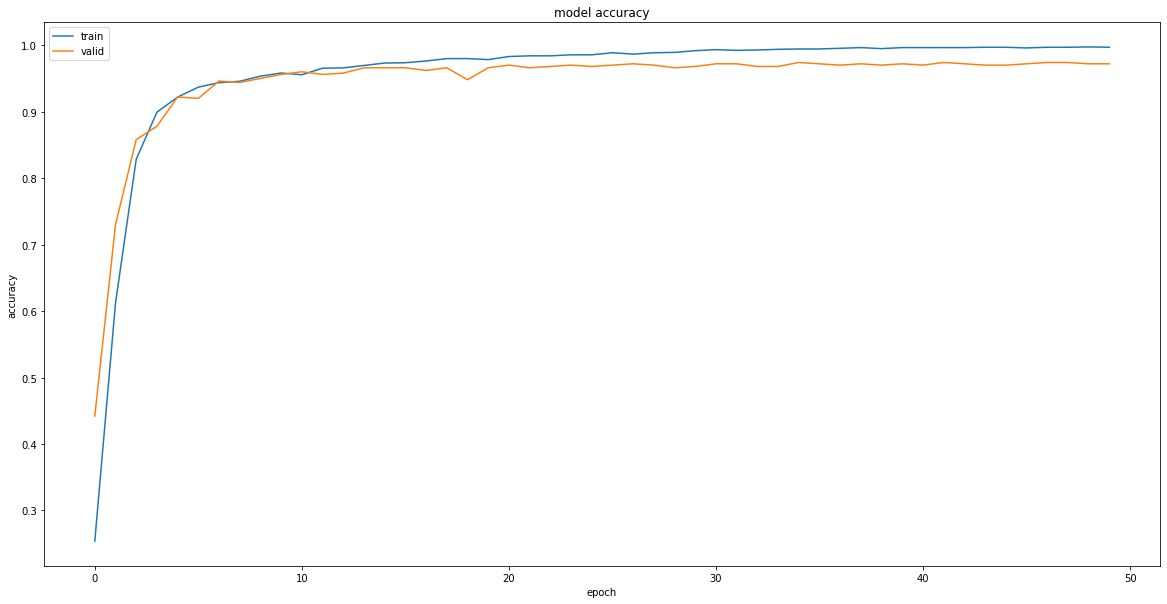

In [42]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

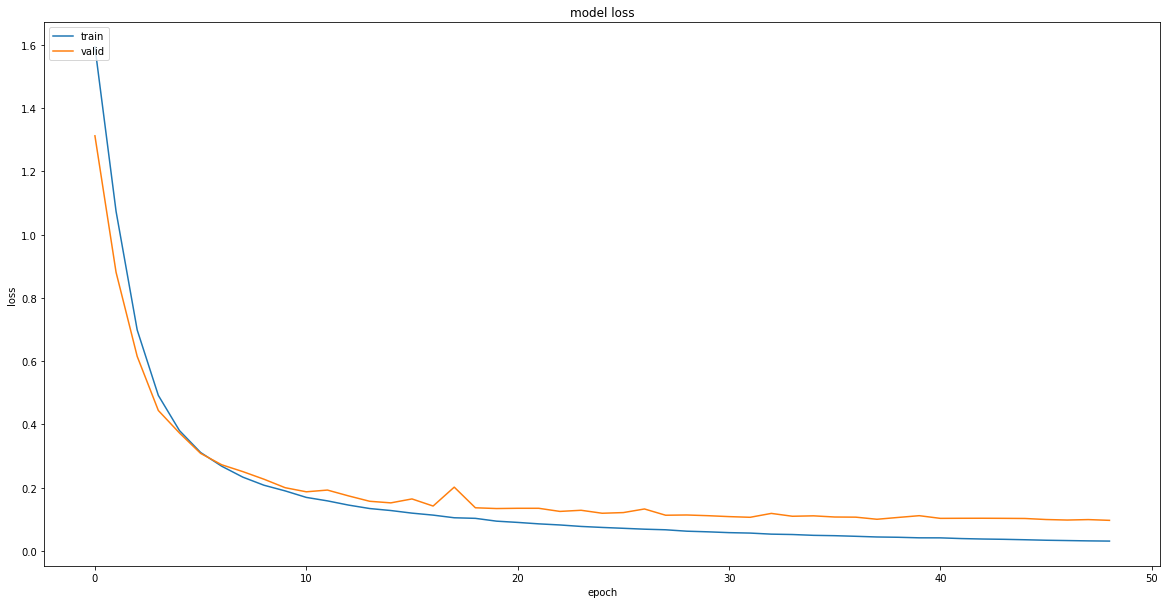

In [43]:
# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.98      0.96      0.97        45
           2       1.00      0.90      0.95        41
           3       0.94      0.97      0.96        33
           4       0.96      0.93      0.95        59
           5       0.95      1.00      0.97        58
           6       1.00      0.98      0.99        44
           7       0.94      0.98      0.96        47
           8       0.90      0.95      0.93        40
           9       0.93      0.93      0.93        43

    accuracy                           0.96       446
   macro avg       0.96      0.96      0.96       446
weighted avg       0.96      0.96      0.96       446



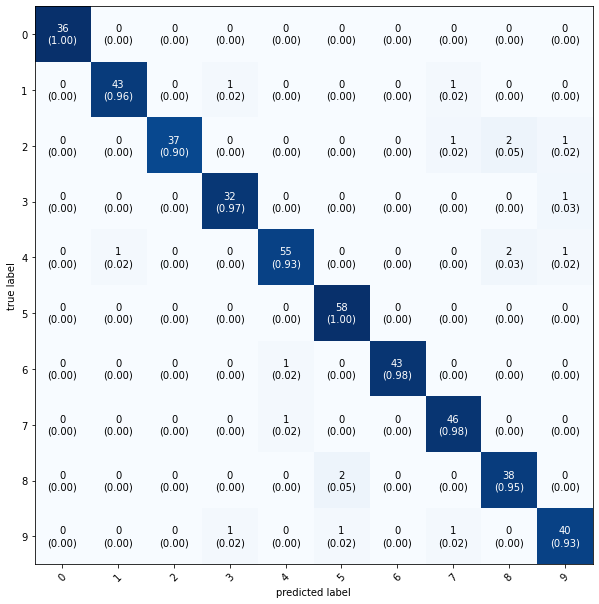

In [52]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})
x = X_test
y = y_test
model = load_model("check_points/0.130225.hdf5")
y_pred = model.predict_classes(x)
y_true = np.argmax(y, axis=1)
labels = [str(i) for i in range(10)]
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()

# Letter

In [10]:
X_train = load_data("data/letter_train_data.txt", 16)
X_valid = load_data("data/letter_valid_data.txt", 16)
X_test = load_data("data/letter_test_data.txt", 16)

y_train = load_data("data/letter_train_label.txt", 26)
y_valid = load_data("data/letter_valid_label.txt", 26)
y_test = load_data("data/letter_test_label.txt", 26)

In [12]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/letter_{val_loss:05f}.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 2.6309 - acc: 0.2530 - val_loss: 1.8704 - val_acc: 0.4945
Epoch 2/10
375/375 [==============================] - 0s 905us/step - loss: 1.5500 - acc: 0.5588 - val_loss: 1.3320 - val_acc: 0.6087
Epoch 3/10
375/375 [==============================] - 0s 969us/step - loss: 1.1891 - acc: 0.6630 - val_loss: 1.1157 - val_acc: 0.6848
Epoch 4/10
375/375 [==============================] - 0s 929us/step - loss: 1.0283 - acc: 0.7042 - val_loss: 0.9316 - val_acc: 0.7387
Epoch 5/10
375/375 [==============================] - 0s 900us/step - loss: 0.9190 - acc: 0.7388 - val_loss: 0.9117 - val_acc: 0.7343
Epoch 6/10
375/375 [==============================] - 0s 918us/step - loss: 0.8349 - acc: 0.7609 - val_loss: 0.7880 - val_acc: 0.7793
Epoch 7/10
375/375 [==============================] - 0s 904us/step - loss: 0.7699 - acc: 0.7778 - val_loss: 0.7186 - val_acc: 0.8023
Epoch 8/10
375/375 [==============================] - 0s 897us/s

/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.87      0.68      0.76       144
           2       0.91      0.69      0.79       167
           3       0.84      0.80      0.82       160
           4       0.66      0.79      0.72       147
           5       0.82      0.76      0.79       165
           6       0.60      0.86      0.71       155
           7       0.65      0.64      0.64       141
           8       0.93      0.78      0.85       151
           9       0.96      0.84      0.90       154
          10       0.66      0.87      0.75       149
          11       0.83      0.90      0.87       161
          12       0.81      0.97      0.88       148
          13       0.90      0.83      0.87       160
          14       0.94      0.72      0.81       140
          15       0.98      0.74      0.84       161
          16       0.89      0.79      0.84       165
          17       0.75    

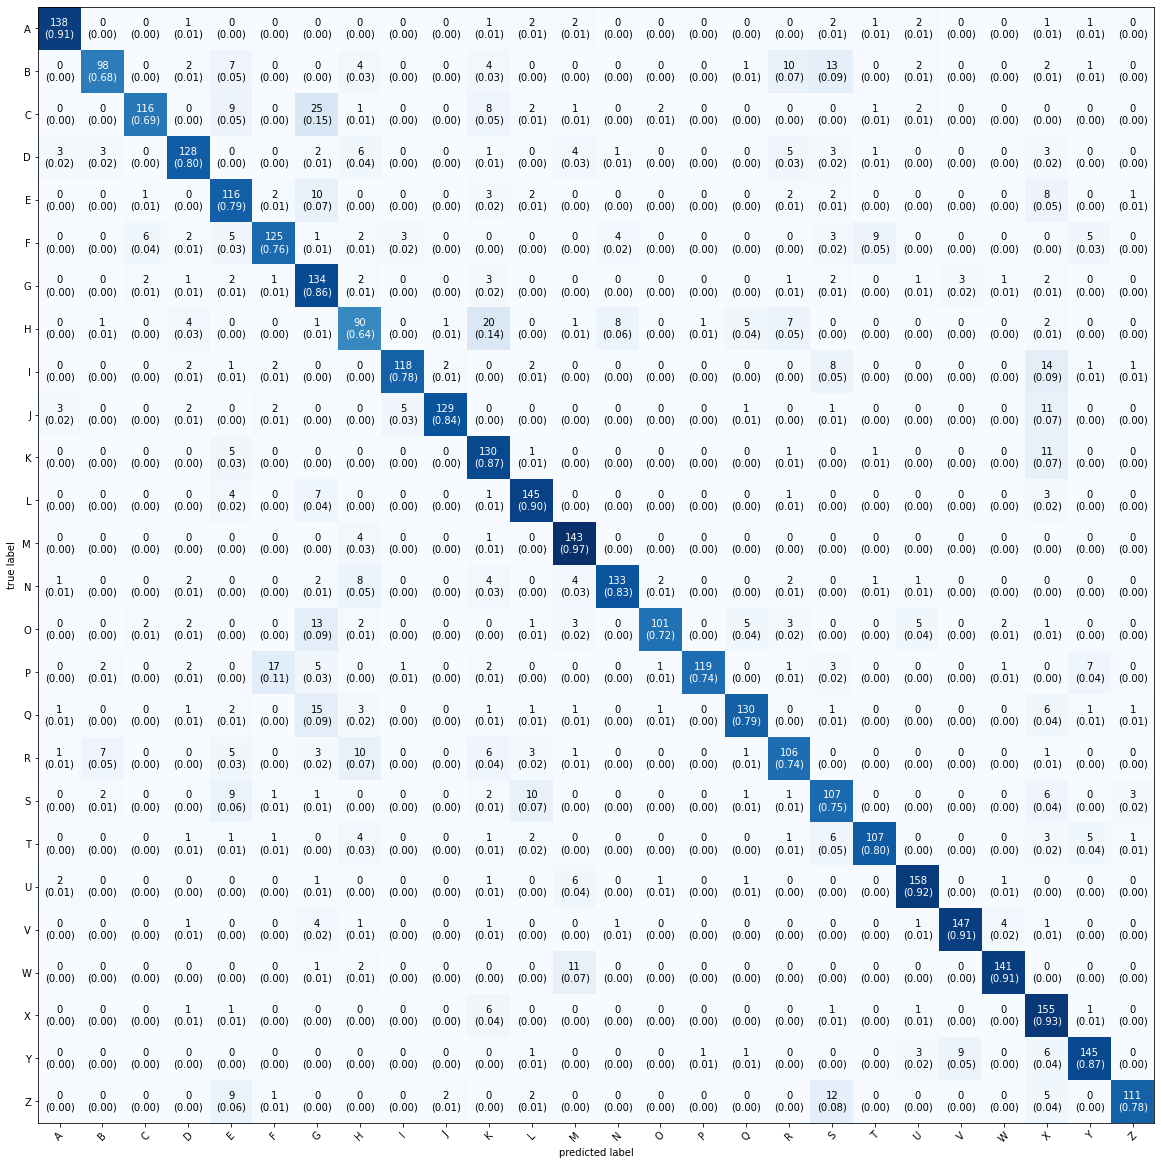

In [16]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})

model = load_model("check_points/letter_0.653771.hdf5")
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (20, 40)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()

# Spam

In [54]:
X_train = load_data("data/spam_train_data.txt", 57)
X_valid = load_data("data/spam_valid_data.txt", 57)
X_test = load_data("data/spam_test_data.txt", 57)

y_train = load_data("data/spam_train_label.txt", 2)
y_valid = load_data("data/spam_valid_label.txt", 2)
y_test = load_data("data/spam_test_label.txt", 2)

In [28]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=500,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/spam.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/500
44/44 [==============================] - 0s 3ms/step - loss: 12.2088 - acc: 0.6359 - val_loss: 0.6745 - val_acc: 0.7109
Epoch 2/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6595 - acc: 0.6978 - val_loss: 0.6479 - val_acc: 0.6946
Epoch 3/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6506 - acc: 0.6779 - val_loss: 0.7016 - val_acc: 0.7087
Epoch 4/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6503 - acc: 0.6681 - val_loss: 0.6358 - val_acc: 0.6728
Epoch 5/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6400 - acc: 0.6772 - val_loss: 0.6710 - val_acc: 0.6000
Epoch 6/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6526 - acc: 0.6522 - val_loss: 0.6682 - val_acc: 0.6087
Epoch 7/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6323 - acc: 0.6721 - val_loss: 0.6049 - val_acc: 0.7043
Epoch 8/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6368 - 

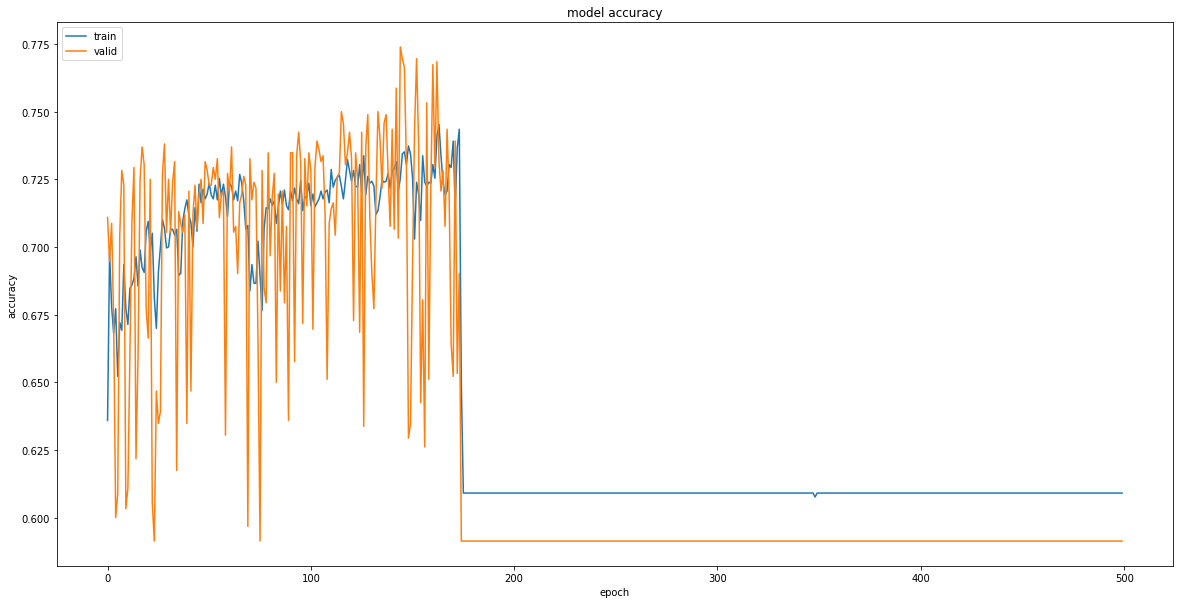

In [29]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

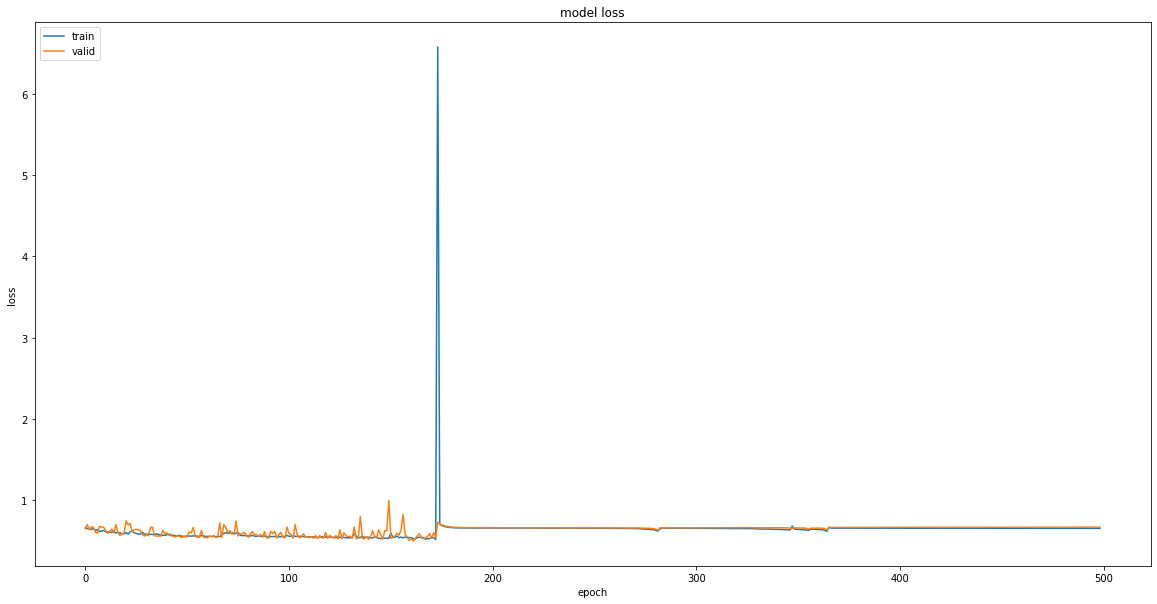

In [30]:
# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       563
           1       0.79      0.58      0.67       358

    accuracy                           0.78       921
   macro avg       0.78      0.74      0.75       921
weighted avg       0.78      0.78      0.77       921



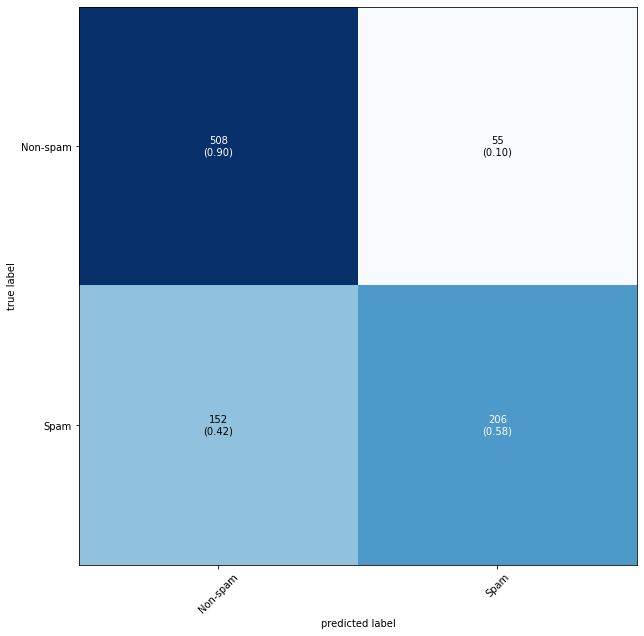

In [57]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})

model = load_model("check_points/spam.hdf5")
x = X_test
y = y_test
y_pred = model.predict_classes(x)
y_true = np.argmax(y, axis=1)
labels = ['Non-spam', 'Spam']
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()